# Interquartile Range (IQR)

## Introduction

Pre-requisite: Quartiles, Quantiles and Percentiles

The **Interquartile range (IQR)** is the difference between the 75th percentile (0.75 quantile) and the 25th percentile (0.25 quantile). The IQR can be used to detech outliers in the data.


<img src="img/IQR.jpg" width="600px"/>

## Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1 - Dataset

For this tutorial, we will use the global average temperatures from 1980 to 2016. The original dataset can be found here https://datahub.io/core/global-temp.

In [2]:
df = pd.read_csv("../data/temperature_CO2.csv")
df = df.dropna()
df = df[['year', 'temperature']]
df.head(3)

,year,temperature
0,2016,0.99
1,2015,0.87
2,2014,0.74


Let's see how the data looks like. It turns out that the mean annual global temperature on Earth is relatively cold. In fact, the annual global temperature from 2000 to 2009 was 0.61 °C, so 1.1 °F (source [here](https://www.currentresults.com/Environment-Facts/changes-in-earth-temperature.php)).

### 2 - Compute the percentiles

To compute the IQR, we need to know which temperature corresponds to:  
  - the 25th percentile (ie, warmer than 25% of the temperatures in this dataset)
  - the 75th percentile (ie, warmer than 75% of the temperatures in this dataset)
  
To achieve this, first sort your dataset by ascending temperature, and rest the indices.

In [3]:
df = df.sort_values(by='temperature').reset_index(drop=True)
df.head()

,year,temperature
0,1985,0.12
1,1982,0.13
2,1984,0.15
3,1986,0.19
4,1992,0.23


Then, use a rule of three to find the index of the value corresponding to your percentile rank. Example for the 25th percentile:

$$ 
\begin{align}
 \textbf{length(data) - 1}  &\longrightarrow 100^{th} \text{percentile} \\
 \textbf{x}                &\longrightarrow 25^{th} \text{percentile} \\
\end{align}
$$

The <code>-1</code> takes into account the fact that indices start at zero. So 

$$x = \frac{(\text{length(data)} - 1) * 25}{100}$$

And in general

$$x = \frac{(\text{length(data)} - 1) * \text{percentile_rank}}{100}$$

In [4]:
def get_percentile(df, percentile_rank):
    
    # First, sort by ascending temperature, reset the indices
    df = df.sort_values(by='temperature').reset_index()
    
    # Rule of three to get the index of the temperature
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    # Return the temperature corresponding to the percentile rank
    return df.at[index, 'temperature']

So we see that the 25th percentile is 0.32 degrees Celcius, and the 75th percentile is 0.63 degrees celcius.

In [5]:
get_percentile(df, 25)

0.32

In [6]:
get_percentile(df, 75)

0.63

### 3 - Compute the IQR

Almost done: since the interquartile range (IQR) is the difference between the 75th percentile and the 25th percentile, all we need to do is to subtract both temperature values.

In [7]:
def interquartile_range(df):
    
    p75 = get_percentile(df, 75)  # 75th percentile
    p25 = get_percentile(df, 25)  # 75th percentile
    iqr = p75 - p25  # Interquartile Range
    return iqr

So our computed interquartile range for the temperature dataframe is 0.31

In [8]:
interquartile_range(df)

0.31

## Validation

Coding the IQR from scratch is a good way to learn the math behind it, but in real life, you would use a Python library to save time. We can use the <code>iqr()</code> function from <code>scipy.stats</code> to validate our result.

In [9]:
from scipy.stats import iqr

iqr(df['temperature'])

0.31

Yay, we got the same value :-D

## Visualization

Let's plot the 25th percentile, the 50th percentile (median) and the 75th percentile of the data.

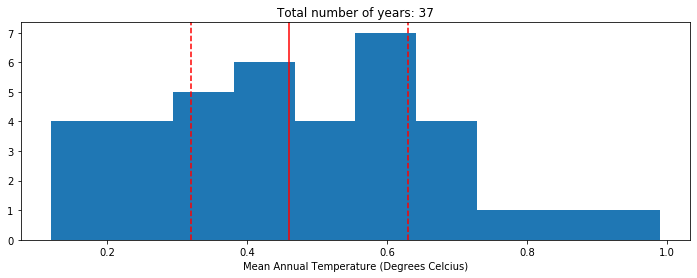

In [10]:
plt.figure(figsize=(12,4))
plt.hist(df['temperature'])
plt.title("Total number of years: %s" % len(df.index))
plt.xlabel("Mean Annual Temperature (Degrees Celcius)")

# Vertical lines for each percentile of interest
plt.axvline(get_percentile(df, 25), linestyle='--', color='red')
plt.axvline(get_percentile(df, 50), linestyle='-',  color='red')
plt.axvline(get_percentile(df, 75), linestyle='--', color='red')

plt.show()

## Additional links

  - [Think Stats, Chapter 4](https://greenteapress.com/thinkstats/)
  - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html
  - https://en.wikipedia.org/wiki/Interquartile_range

## Extra: Data Preparation Steps

In [11]:
# Global temperatures
temp = pd.read_csv("../data/global_temp_annual.csv")
temp = temp.rename(columns={'Year':'year', 'Mean':'temperature'})

# Mean CO2
CO2 = pd.read_csv("../data/rates_CO2.csv")
CO2['Date'] = pd.to_datetime(CO2['Date']).dt.year
CO2 = CO2.rename(columns={'Date':'year', 'MeanCO2':'CO2'})

# Merge both dataframes
df = pd.merge(temp, CO2, on='year', how='inner')
df.to_csv("../data/temperature_CO2.csv", index=False)